In [1]:
#coding=utf-8  
import requests  
import urllib  
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [13]:
def search_name(name):
    url_format = "http://data.weibo.com/index/ajax/hotword?word={}&flag=nolike&_t=0"
    cookie_header = {
                     "User-Agent":"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.81 Safari/537.36",
                     "Referer":"http://data.weibo.com/index?sudaref=www.google.com"
                   }

    urlname = urllib.quote(name)
    first_requests = url_format.format(urlname)
    codes = requests.get(first_requests,headers=cookie_header).json()
    if codes["data"] == 'null':
        return None
    ids = codes["data"]["id"]

    header = {
        "Connection":"keep-alive",
        "Accept-Encoding": "gzip, deflate, sdch",
        "Accept": "*/*",
        "User-Agent":"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.81 Safari/537.36",
        "Accept-Language": "zh-CN,zh;q=0.8",
        "Referer": "http://data.weibo.com/index/hotword?wid={}&wname={}".format(ids,urlname),
        "Content-Type": "application/x-www-form-urlencoded",
        "Host":"data.weibo.com"
    }

    #获取日期
    date_url = "http://data.weibo.com/index/ajax/getdate?month=60&__rnd=1498190033389"
    print date_url
    dc = requests.get(date_url,headers=header).json()
    edate, sdate = dc["edate"],dc["sdate"]

    #数据返回
    print "http://data.weibo.com/index/ajax/getchartdata?wid={}&sdate={}&edate={}"\
                         .format(ids,sdate,edate)
    codes = requests.get("http://data.weibo.com/index/ajax/getchartdata?wid={}&sdate={}&edate={}"\
                         .format(ids,sdate,edate),headers=header).json()
    return codes

In [14]:
res = search_name('债券')

http://data.weibo.com/index/ajax/getdate?month=60&__rnd=1498190033389
http://data.weibo.com/index/ajax/getchartdata?wid=1091324104827&sdate=2013-05-14&edate=2018-05-13


In [6]:
print res

{u'zt': False, u'yd': False}


In [199]:
df = pd.DataFrame(res['yd'])

In [200]:
df.shape

(1465, 3)

In [191]:
df.head()

,daykey,mobile,pc
0,2014-01-06,560994,4013739
1,2014-01-07,688636,5476420
2,2014-01-08,670589,5672651
3,2014-01-09,642509,6052325
4,2014-01-10,676727,6818627


In [192]:
df.tail()

,daykey,mobile,pc
1460,2018-03-08,1286039,214341
1461,2018-03-09,1334130,200218
1462,2018-03-10,1713493,152384
1463,2018-03-11,1304957,116452
1464,2018-03-12,1569044,280980


In [193]:
df.index = pd.to_datetime(df['daykey'])

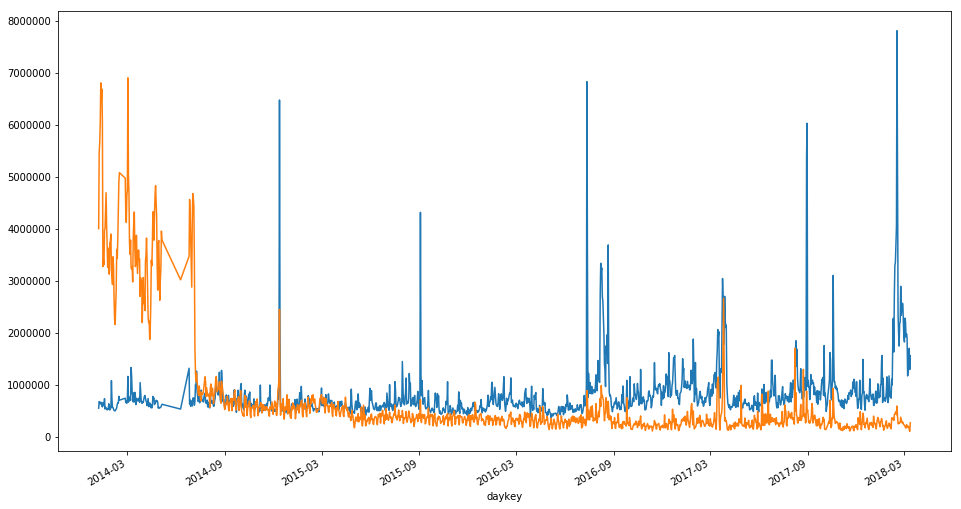

In [194]:
df['mobile'].astype(int).plot(figsize=(16, 9), label='mobile')
df['pc'].astype(int).plot(figsize=(16, 9), label='pc')

In [195]:
df = pd.DataFrame(res['zt'])

In [198]:
df.shape

(1826, 4)

In [218]:
df = pd.read_excel(u'D:/Data/wei_index/衰退_yd.xlsx', index_col=0)

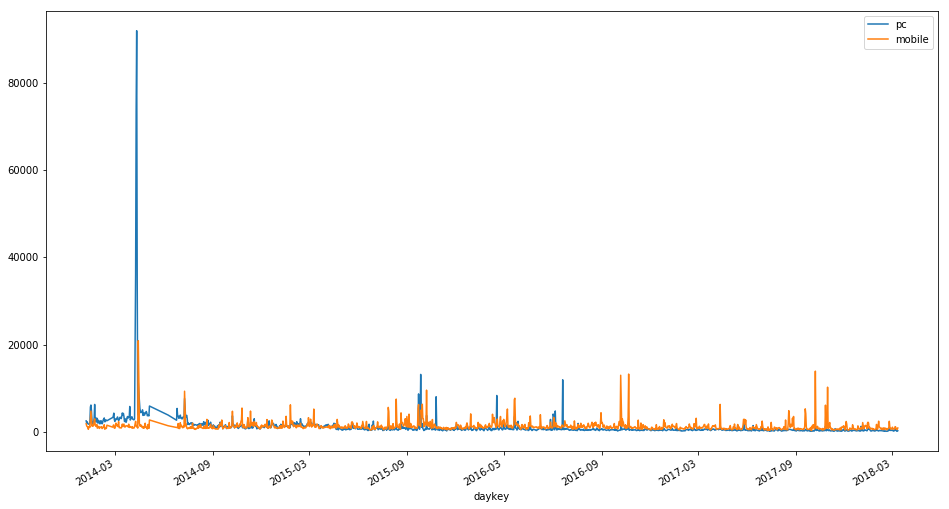

In [219]:
df.plot(figsize=(16, 9))